In [11]:
import numpy as np
x = (1,2,3,6,9,8,7,5)
z = np.mean(x)
print(z)

5.125


In [13]:
import pandas as pd
df = pd.read_csv('/kaggle/input/random/r1.csv')
df.head()

,IM1,IM2,IM3,IM4,IM5,CRM1,CRM2,CRM3,CRM4,CRM5,...,IF2,IF3,IF4,PQ1,PQ2,PQ3,PQ4,PQ5,PQ6,PQ7
0,4,5,4,4,3,4,5,4,3,4,...,4,3,4,3,4,5,4,4,3,4
1,4,3,5,4,5,5,3,4,5,5,...,4,4,3,4,3,5,3,5,4,3
2,3,4,5,5,4,4,4,4,3,3,...,4,4,4,5,5,4,3,4,4,2
3,3,2,3,2,1,2,3,3,3,2,...,2,3,3,1,3,2,3,2,3,5
4,5,4,4,4,5,3,3,3,3,2,...,5,5,3,3,5,3,4,4,4,3


In [15]:
import statsmodels.formula.api as smf
model = smf.ols('CRM1 ~ IM1 + IM2 + IM3 + IM5', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRM1   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     15.41
Date:                Sun, 31 Dec 2023   Prob (F-statistic):           1.86e-11
Time:                        16:35:26   Log-Likelihood:                -357.84
No. Observations:                 300   AIC:                             725.7
Df Residuals:                     295   BIC:                             744.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6088      0.217     12.049      0.0

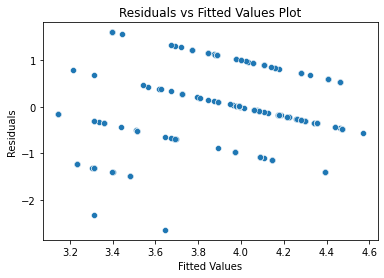

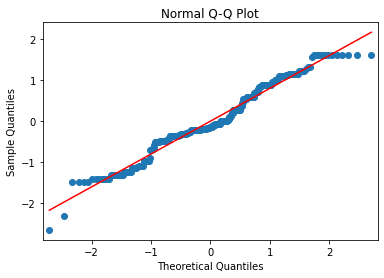

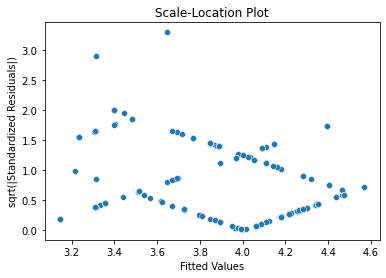

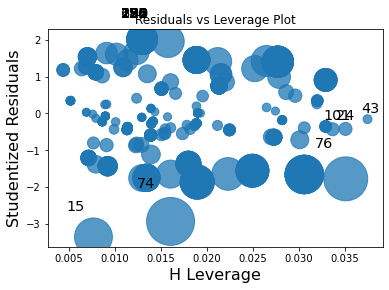

In [16]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Fit the OLS model
model = sm.OLS(df['CRM1'], sm.add_constant(df[['IM1', 'IM2', 'IM3', 'IM5']]))
results = model.fit()

# Residuals vs Fitted Values plot
sns.scatterplot(x=results.fittedvalues, y=results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values Plot")
plt.show()

# Normal Q-Q plot
sm.qqplot(results.resid, line='s')
plt.title("Normal Q-Q Plot")
plt.show()

# Scale-Location (Spread-Location) plot
sns.scatterplot(x=results.fittedvalues, y=abs(results.get_influence().resid_studentized_internal))
plt.xlabel("Fitted Values")
plt.ylabel("sqrt(|Standardized Residuals|)")
plt.title("Scale-Location Plot")
plt.show()

# Residuals vs Leverage plot
sm.graphics.influence_plot(results)
plt.title("Residuals vs Leverage Plot")
plt.show()
